In [1]:
# set up some environmental dependencies
import time, sys, os
import h5py
import numpy as np
from astropy.table import Table
import scipy
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo
from astropy.table import Table
import astropy.cosmology.units as cu
import astropy.units as u
from matplotlib.pyplot import *
import seaborn as sns
import numpy as np, matplotlib.pyplot as plt
from astropy.convolution import convolve, Box1DKernel
from astropy.io import ascii
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
import matplotlib
from astropy.table import Table
import warnings
warnings.filterwarnings("ignore")

# standard imports for my work
from bpt_utils import *
from read_transients_data import *
from correct_redshift_evolution import *
from generate_bkg_galaxies import *
from helper_functions import *

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['image.origin'] = 'lower'
sns.set_context('talk') 
sns.set(font_scale=1.6)
sns.set_palette('colorblind')
sns.set_style('ticks')
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'Verdana', 'Lucida Grande', 'DejaVu Sans']

cmap = matplotlib.cm.get_cmap('magma_r')
colors = ["white", "white", "white"]+[cmap(i/100) for i in range(100)]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", 
                                                           colors)


In [2]:
# Read in transients data
frb_df = read_frbs_hosts_data()
TypeIaSN_df = read_TypeIaSNe_hosts_data()
ULX_df = read_ULXsources_hosts_data(True)
CCSN_df = read_CCSNe_hosts_data()
SLSN_df = read_SLSNe_hosts_data()
sgrb_df = read_sGRB_hosts_data()
lgrb_df = read_lGRB_hosts_data()


In [3]:
# Correct stellar mass and SFRs for redshift evolution and 
# generate 100 samples within the error bars
frb_logM_samples_corr, frb_logSFR_samples_corr = generate_z_corr_samples(frb_df)
TypeIaSN_logM_samples_corr, TypeIaSN_logSFR_samples_corr = generate_z_corr_samples(TypeIaSN_df)
ULX_logM_samples_corr, ULX_logSFR_samples_corr = generate_z_corr_samples(ULX_df)
CCSN_logM_samples_corr, CCSN_logSFR_samples_corr = generate_z_corr_samples(CCSN_df)
SLSN_logM_samples_corr, SLSN_logSFR_samples_corr = generate_z_corr_samples(SLSN_df)
sgrb_logM_samples_corr, sgrb_logSFR_samples_corr = generate_z_corr_samples(sgrb_df)
lgrb_logM_samples_corr, lgrb_logSFR_samples_corr = generate_z_corr_samples(lgrb_df)


100%|██████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 49.17it/s]


In [4]:
def get_hist_outs(logM_samples_corr, logSFR_samples_corr):
    bins_logM = np.linspace(5, 12, 100)
    bins_logSFR = np.linspace(-5, 3, 100)
    bins_logsSFR = np.linspace(-5, 3, 100)
    
    outs_logM, outs_logSFR, outs_logsSFR = [], [], []
    for i in tqdm(range(100)):
        out = plt.hist(logM_samples_corr[:, i],
                       bins=bins_logM, alpha=0,
                       histtype="step", color="blue", lw=1,
                       cumulative=True, density=True)
        outs_logM.append(out[0])
        out = plt.hist(logSFR_samples_corr[:, i],
                       bins=bins_logSFR, alpha=0,
                       histtype="step", color="blue", lw=1,
                       cumulative=True, density=True)
        outs_logSFR.append(out[0])
        out = plt.hist(np.array(logSFR_samples_corr[:, i])-np.array(logM_samples_corr[:, i])+9,
                       bins=bins_logsSFR, alpha=0,
                       histtype="step", color="blue", lw=1,
                       cumulative=True, density=True)
        outs_logsSFR.append(out[0])
    plt.close()
    return outs_logM, outs_logSFR, outs_logsSFR


TypeIaSN_outs_logM, TypeIaSN_outs_logSFR, TypeIaSN_outs_logsSFR = get_hist_outs(TypeIaSN_logM_samples_corr, TypeIaSN_logSFR_samples_corr)
CCSN_outs_logM, CCSN_outs_logSFR, CCSN_outs_logsSFR = get_hist_outs(CCSN_logM_samples_corr, CCSN_logSFR_samples_corr)
SLSN_outs_logM, SLSN_outs_logSFR, SLSN_outs_logsSFR = get_hist_outs(SLSN_logM_samples_corr, SLSN_logSFR_samples_corr)
ULX_outs_logM, ULX_outs_logSFR, ULX_outs_logsSFR = get_hist_outs(ULX_logM_samples_corr, ULX_logSFR_samples_corr)
sgrb_outs_logM, sgrb_outs_logSFR, sgrb_outs_logsSFR = get_hist_outs(sgrb_logM_samples_corr, sgrb_logSFR_samples_corr)
lgrb_outs_logM, lgrb_outs_logSFR, lgrb_outs_logsSFR = get_hist_outs(lgrb_logM_samples_corr, lgrb_logSFR_samples_corr)
frb_outs_logM, frb_outs_logSFR, frb_outs_logsSFR = get_hist_outs(frb_logM_samples_corr, frb_logSFR_samples_corr)


100%|████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 57.14it/s]


In [5]:
from scipy import stats
def compute_pvalues(frbs_vals, transient_vals):
    pvalues = []
    for i in range(100):
        pvalues.append(stats.ks_2samp(frbs_vals[:, i], transient_vals[:, i]).pvalue)
    return pvalues

frb_logsSFR_samples_corr = np.array(frb_logSFR_samples_corr)-np.array(frb_logM_samples_corr)+9
TypeIaSN_logsSFR_samples_corr = np.array(TypeIaSN_logSFR_samples_corr)-np.array(TypeIaSN_logM_samples_corr)+9
CCSN_logsSFR_samples_corr = np.array(CCSN_logSFR_samples_corr)-np.array(CCSN_logM_samples_corr)+9
SLSN_logsSFR_samples_corr = np.array(SLSN_logSFR_samples_corr)-np.array(SLSN_logM_samples_corr)+9
ULX_logsSFR_samples_corr = np.array(ULX_logSFR_samples_corr)-np.array(ULX_logM_samples_corr)+9
sgrb_logsSFR_samples_corr = np.array(sgrb_logSFR_samples_corr)-np.array(sgrb_logM_samples_corr)+9
lgrb_logsSFR_samples_corr = np.array(lgrb_logSFR_samples_corr)-np.array(lgrb_logM_samples_corr)+9

TypeIaSN_pvalues_logM, TypeIaSN_pvalues_logSFR, TypeIaSN_pvalues_logsSFR = compute_pvalues(frb_logM_samples_corr, TypeIaSN_logM_samples_corr), compute_pvalues(frb_logSFR_samples_corr, TypeIaSN_logSFR_samples_corr), compute_pvalues(frb_logsSFR_samples_corr, TypeIaSN_logsSFR_samples_corr)
CCSN_pvalues_logM, CCSN_pvalues_logSFR, CCSN_pvalues_logsSFR = compute_pvalues(frb_logM_samples_corr, CCSN_logM_samples_corr), compute_pvalues(frb_logSFR_samples_corr, CCSN_logSFR_samples_corr), compute_pvalues(frb_logsSFR_samples_corr, CCSN_logsSFR_samples_corr)
SLSN_pvalues_logM, SLSN_pvalues_logSFR, SLSN_pvalues_logsSFR = compute_pvalues(frb_logM_samples_corr, SLSN_logM_samples_corr), compute_pvalues(frb_logSFR_samples_corr, SLSN_logSFR_samples_corr), compute_pvalues(frb_logsSFR_samples_corr, SLSN_logsSFR_samples_corr)
ULX_pvalues_logM, ULX_pvalues_logSFR, ULX_pvalues_logsSFR = compute_pvalues(frb_logM_samples_corr, ULX_logM_samples_corr), compute_pvalues(frb_logSFR_samples_corr, ULX_logSFR_samples_corr), compute_pvalues(frb_logsSFR_samples_corr, ULX_logsSFR_samples_corr)
sgrb_pvalues_logM, sgrb_pvalues_logSFR, sgrb_pvalues_logsSFR = compute_pvalues(frb_logM_samples_corr, sgrb_logM_samples_corr), compute_pvalues(frb_logSFR_samples_corr, sgrb_logSFR_samples_corr), compute_pvalues(frb_logsSFR_samples_corr, sgrb_logsSFR_samples_corr)
lgrb_pvalues_logM, lgrb_pvalues_logSFR, lgrb_pvalues_logsSFR = compute_pvalues(frb_logM_samples_corr, lgrb_logM_samples_corr), compute_pvalues(frb_logSFR_samples_corr, lgrb_logSFR_samples_corr), compute_pvalues(frb_logsSFR_samples_corr, lgrb_logsSFR_samples_corr)

print("TypeIaSN", np.percentile(TypeIaSN_pvalues_logM, 50), np.percentile(TypeIaSN_pvalues_logSFR, 50), np.percentile(TypeIaSN_pvalues_logsSFR, 50))
print("CCSN", np.percentile(CCSN_pvalues_logM, 50), np.percentile(CCSN_pvalues_logSFR, 50), np.percentile(CCSN_pvalues_logsSFR, 50))
print("SLSN", np.percentile(SLSN_pvalues_logM, 50), np.percentile(SLSN_pvalues_logSFR, 50), np.percentile(SLSN_pvalues_logsSFR, 50))
print("ULX", np.percentile(ULX_pvalues_logM, 50), np.percentile(ULX_pvalues_logSFR, 50), np.percentile(ULX_pvalues_logsSFR, 50))
print("sGRB", np.percentile(sgrb_pvalues_logM, 50), np.percentile(sgrb_pvalues_logSFR, 50), np.percentile(sgrb_pvalues_logsSFR, 50))
print("lGRB", np.percentile(lgrb_pvalues_logM, 50), np.percentile(lgrb_pvalues_logSFR, 50), np.percentile(lgrb_pvalues_logsSFR, 50))


TypeIaSN 0.05385646516314356 0.44806993706138054 0.0026641449448908446
CCSN 0.0024857757170743977 0.21211044497230336 0.04319947644160247
SLSN 1.2825280328927128e-15 0.00047342785050178023 2.1227840063510793e-11
ULX 5.137855392223916e-07 0.031190315263296867 0.12394258015965508
sGRB 0.0010274086438801394 0.021674477386853564 0.2716507758000999
lGRB 4.880648302155114e-12 0.09033159219960718 2.600187419802028e-08


Text(0.02, 1.04, 'c')

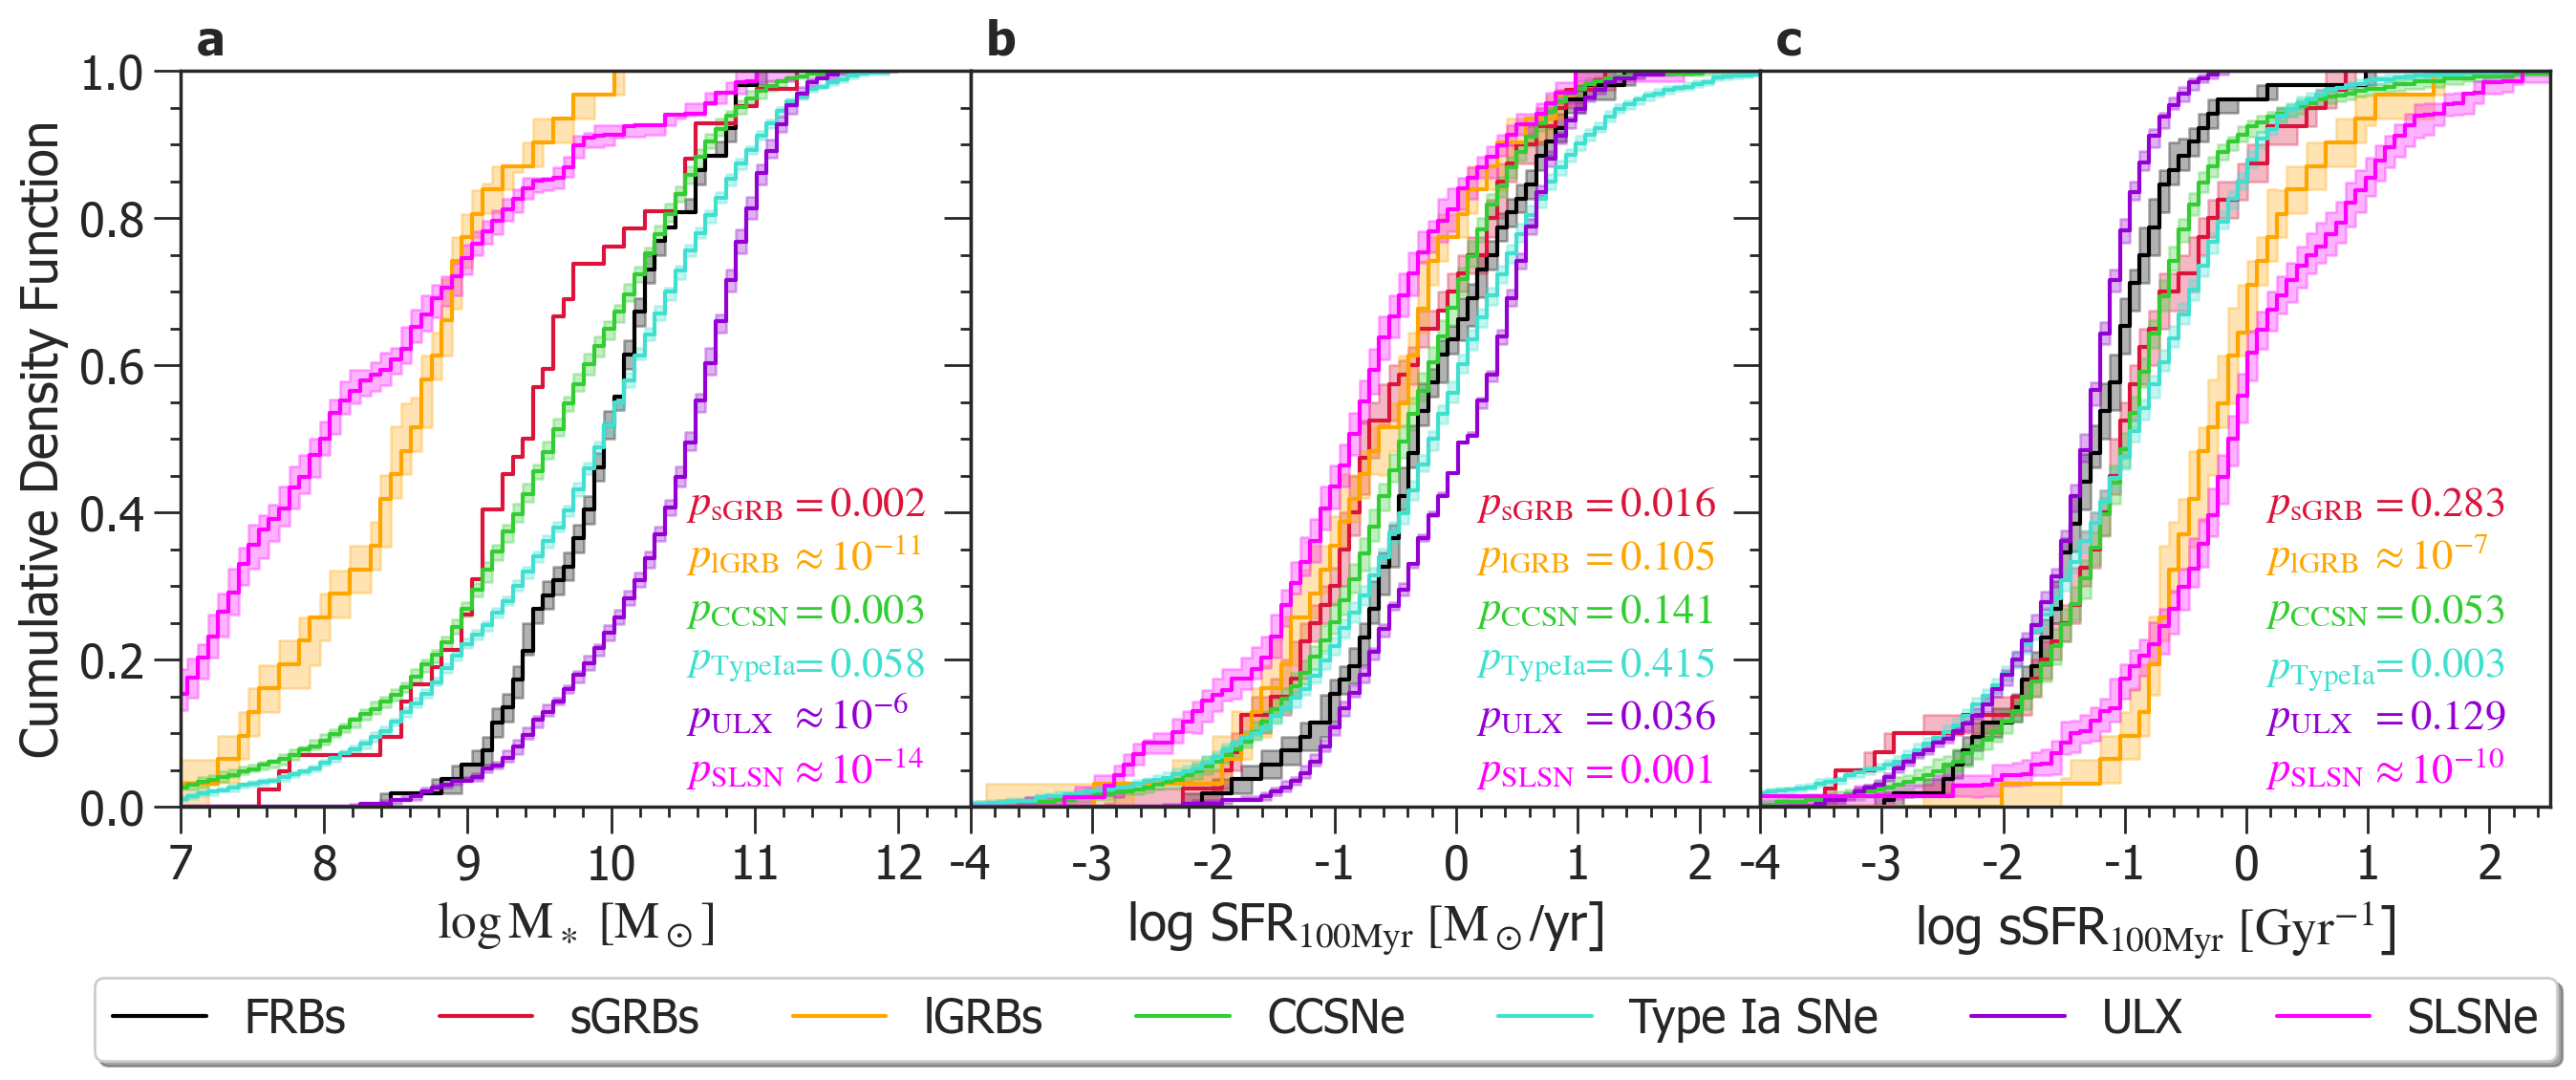

In [6]:
fontsize = 16
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(16, 5))

axes[0].tick_params(axis='x')
axes[0].tick_params(axis='y')

bins_logM = np.linspace(5, 12, 100)
bins_logM_ = []
for i in range(len(bins_logM)-1):
    bins_logM_.append(bins_logM[i]), bins_logM_.append(bins_logM[i+1])

quant16, quant50, quant84 = return_quants(frb_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="black", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="FRBs",
            alpha=1, color="black", lw=1.5)

quant16, quant50, quant84 = return_quants(sgrb_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="crimson", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="sGRBs",
            alpha=1, color="crimson", lw=1.5)

quant16, quant50, quant84 = return_quants(lgrb_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="orange", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="lGRBs",
            alpha=1, color="orange", lw=1.5)

quant16, quant50, quant84 = return_quants(CCSN_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="limegreen", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="CCSNe",
            alpha=1, color="limegreen", lw=1.5)

quant16, quant50, quant84 = return_quants(TypeIaSN_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="turquoise", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="Type Ia SNe",
            alpha=1, color="turquoise", lw=1.5)

quant16, quant50, quant84 = return_quants(ULX_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="darkviolet", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="ULX",
            alpha=1, color="darkviolet", lw=1.5)

quant16, quant50, quant84 = return_quants(SLSN_outs_logM, 1)
axes[0].fill_between(bins_logM_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="magenta", alpha=0.3)
_ = axes[0].plot(bins_logM_, np.array(quant50), label="SLSNe",
            alpha=1, color="magenta", lw=1.5)


axes[0].set_xlim(7, 12)
axes[0].set_ylim(0, 1)
axes[0].set_xlabel(r"$\log{{\mathrm{M}}_\ast}~[{\mathrm{M}}_\odot]$")
axes[0].set_ylabel("Cumulative Density Function")

axes[0].text(0.69-0.05, 0.35+0.0625, r"$p_{\mathrm{sGRB}}$",
             color="crimson", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)
axes[0].text(0.82-0.05, 0.35+0.0625, r"$= 0.002$",
             color="crimson", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)

axes[0].text(0.69-0.05, 0.29+0.05, r"$p_{\mathrm{lGRB}}$",
             color="orange", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)
axes[0].text(0.82-0.05, 0.29+0.05, r"$\approx 10^{-11}$",
             color="orange", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)

axes[0].text(0.69-0.05, 0.23+0.0375, r"$p_{\mathrm{CCSN}}$",
             color="limegreen", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)
axes[0].text(0.82-0.05, 0.23+0.0375, r"$= 0.003$",
             color="limegreen", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)

axes[0].text(0.69-0.05, 0.17+0.025, r"$p_{\mathrm{TypeIa}}$",
             color="turquoise", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)
axes[0].text(0.82-0.05, 0.17+0.025, r"$= 0.058$",
             color="turquoise", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)

axes[0].text(0.69-0.05, 0.11+0.0125, r"$p_{\mathrm{ULX}}$",
             color="darkviolet", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)
axes[0].text(0.82-0.05, 0.11+0.0125, r"$\approx 10^{-6}$",
             color="darkviolet", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)

axes[0].text(0.69-0.05, 0.05, r"$p_{\mathrm{SLSN}}$",
             color="magenta", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)
axes[0].text(0.82-0.05, 0.05, r"$\approx 10^{-14}$",
             color="magenta", ha='left', va='center', 
             transform=axes[0].transAxes, fontsize=fontsize)

axes[1].tick_params(axis='x')
axes[1].tick_params(axis='y')

bins_logSFR = np.linspace(-5, 3, 100)
bins_logSFR_ = []
for i in range(len(bins_logSFR)-1):
    bins_logSFR_.append(bins_logSFR[i]), bins_logSFR_.append(bins_logSFR[i+1])

quant16, quant50, quant84 = return_quants(frb_outs_logSFR, 1)
axes[1].fill_between(bins_logSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="black", alpha=0.3)
_ = axes[1].plot(bins_logSFR_, np.array(quant50), label="FRBs",
            alpha=1, color="black", lw=1.5)

quant16, quant50, quant84 = return_quants(sgrb_outs_logSFR, 1)
axes[1].fill_between(bins_logSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="crimson", alpha=0.3)
_ = axes[1].plot(bins_logSFR_, np.array(quant50), label="sGRBs",
            alpha=1, color="crimson", lw=1.5)

quant16, quant50, quant84 = return_quants(lgrb_outs_logSFR, 1)
axes[1].fill_between(bins_logSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="orange", alpha=0.3)
_ = axes[1].plot(bins_logSFR_, np.array(quant50), label="lGRBs",
            alpha=1, color="orange", lw=1.5)

quant16, quant50, quant84 = return_quants(CCSN_outs_logSFR, 1)
axes[1].fill_between(bins_logSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="limegreen", alpha=0.3)
_ = axes[1].plot(bins_logSFR_, np.array(quant50), label="CCSNe",
            alpha=1, color="limegreen", lw=1.5)

quant16, quant50, quant84 = return_quants(TypeIaSN_outs_logSFR, 1)
axes[1].fill_between(bins_logSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="turquoise", alpha=0.3)
_ = axes[1].plot(bins_logSFR_, np.array(quant50), label="Type Ia SNe",
            alpha=1, color="turquoise", lw=1.5)

quant16, quant50, quant84 = return_quants(ULX_outs_logSFR, 1)
axes[1].fill_between(bins_logSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="darkviolet", alpha=0.3)
_ = axes[1].plot(bins_logSFR_, np.array(quant50), label="ULX",
            alpha=1, color="darkviolet", lw=1.5)

quant16, quant50, quant84 = return_quants(SLSN_outs_logSFR, 1)
axes[1].fill_between(bins_logSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="magenta", alpha=0.3)
_ = axes[1].plot(bins_logSFR_, np.array(quant50), label="SLSNe",
            alpha=1, color="magenta", lw=1.5)

axes[1].set_xlim(-4, 2.25)
axes[1].set_ylim(0, 1)
axes[1].set_xlabel(r"log SFR$_{\rm{100 Myr}}~[{\mathrm{M}}_\odot/$yr]")

axes[1].text(0.69-0.05, 0.35+0.0625, r"$p_{\mathrm{sGRB}}$",
             color="crimson", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=fontsize)
axes[1].text(0.82-0.05, 0.35+0.0625, r"$= 0.016$",
             color="crimson", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=fontsize)

axes[1].text(0.69-0.05, 0.29+0.05, r"$p_{\mathrm{lGRB}}$",
             color="orange", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=fontsize)
axes[1].text(0.82-0.05, 0.29+0.05, r"$= 0.105$",
             color="orange", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=fontsize)
 
axes[1].text(0.69-0.05, 0.23+0.0375, r"$p_{\mathrm{CCSN}}$",
             color="limegreen", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=fontsize)
axes[1].text(0.82-0.05, 0.23+0.0375, r"$= 0.141$",
             color="limegreen", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=fontsize)

axes[1].text(0.69-0.05, 0.17+0.025, r"$p_{\mathrm{TypeIa}}$",
             color="turquoise", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=fontsize)
axes[1].text(0.82-0.05, 0.17+0.025, r"$= 0.415$",
             color="turquoise", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=fontsize)

axes[1].text(0.69-0.05, 0.11+0.0125, r"$p_{\mathrm{ULX}}$",
             color="darkviolet", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=fontsize)
axes[1].text(0.82-0.05, 0.11+0.0125, r"$= 0.036$",
             color="darkviolet", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=fontsize) 

axes[1].text(0.69-0.05, 0.05, r"$p_{\mathrm{SLSN}}$",
             color="magenta", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=fontsize)
axes[1].text(0.82-0.05, 0.05, r"$= 0.001$",
             color="magenta", ha='left', va='center', 
             transform=axes[1].transAxes, fontsize=fontsize)


axes[2].tick_params(axis='x')
axes[2].tick_params(axis='y')

bins_logsSFR = np.linspace(-5, 3, 100)
bins_logsSFR_ = []
for i in range(len(bins_logsSFR)-1):
    bins_logsSFR_.append(bins_logsSFR[i]), bins_logsSFR_.append(bins_logsSFR[i+1])

quant16, quant50, quant84 = return_quants(frb_outs_logsSFR, 1)
axes[2].fill_between(bins_logsSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="black", alpha=0.3)
_ = axes[2].plot(bins_logSFR_, np.array(quant50), label="FRBs",
            alpha=1, color="black", lw=1.5)

quant16, quant50, quant84 = return_quants(sgrb_outs_logsSFR, 1)
axes[2].fill_between(bins_logsSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="crimson", alpha=0.3)
_ = axes[2].plot(bins_logsSFR_, np.array(quant50), label="sGRBs",
            alpha=1, color="crimson", lw=1.5)

quant16, quant50, quant84 = return_quants(lgrb_outs_logsSFR, 1)
axes[2].fill_between(bins_logsSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="orange", alpha=0.3)
_ = axes[2].plot(bins_logsSFR_, np.array(quant50), label="lGRBs",
            alpha=1, color="orange", lw=1.5)

quant16, quant50, quant84 = return_quants(CCSN_outs_logsSFR, 1)
axes[2].fill_between(bins_logsSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="limegreen", alpha=0.3)
_ = axes[2].plot(bins_logsSFR_, np.array(quant50), label="CCSNe",
            alpha=1, color="limegreen", lw=1.5)

quant16, quant50, quant84 = return_quants(TypeIaSN_outs_logsSFR, 1)
axes[2].fill_between(bins_logsSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="turquoise", alpha=0.3)
_ = axes[2].plot(bins_logsSFR_, np.array(quant50), label="Type Ia SNe",
            alpha=1, color="turquoise", lw=1.5)

quant16, quant50, quant84 = return_quants(ULX_outs_logsSFR, 1)
axes[2].fill_between(bins_logsSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="darkviolet", alpha=0.3)
_ = axes[2].plot(bins_logsSFR_, np.array(quant50), label="ULX",
            alpha=1, color="darkviolet", lw=1.5)

quant16, quant50, quant84 = return_quants(SLSN_outs_logsSFR, 1)
axes[2].fill_between(bins_logsSFR_, np.array(quant50)+np.array(quant16), np.array(quant50)+np.array(quant84), 
                color="magenta", alpha=0.3)
_ = axes[2].plot(bins_logsSFR_, np.array(quant50), label="SLSNe",
            alpha=1, color="magenta", lw=1.5)

axes[2].set_xlim(-5, 2.5)
axes[2].set_ylim(0, 1)
axes[2].set_xlabel(r"log sSFR$_{\rm{100 Myr}}~[\rm{Gyr}^{-1}$]")

axes[2].text(0.69-0.05, 0.35+0.0625, r"$p_{\mathrm{sGRB}}$",
             color="crimson", ha='left', va='center', 
             transform=axes[2].transAxes, fontsize=fontsize)
axes[2].text(0.82-0.05, 0.35+0.0625, r"$= 0.283$",
             color="crimson", ha='left', va='center', 
             transform=axes[2].transAxes, fontsize=fontsize)

axes[2].text(0.69-0.05, 0.29+0.05, r"$p_{\mathrm{lGRB}}$",
             color="orange", ha='left', va='center', 
             transform=axes[2].transAxes, fontsize=fontsize)
axes[2].text(0.82-0.05, 0.29+0.05, r"$\approx 10^{-7}$",
             color="orange", ha='left', va='center', 
             transform=axes[2].transAxes, fontsize=fontsize)

axes[2].text(0.69-0.05, 0.23+0.0375, r"$p_{\mathrm{CCSN}}$",
             color="limegreen", ha='left', va='center', 
             transform=axes[2].transAxes, fontsize=fontsize)
axes[2].text(0.82-0.05, 0.23+0.0375, r"$= 0.053$",
             color="limegreen", ha='left', va='center', 
             transform=axes[2].transAxes, fontsize=fontsize)

axes[2].text(0.69-0.05, 0.17+0.0125, r"$p_{\mathrm{TypeIa}}$",
             color="turquoise", ha='left', va='center', 
             transform=axes[2].transAxes, fontsize=fontsize)
axes[2].text(0.82-0.05, 0.17+0.025, r"$= 0.003$",
             color="turquoise", ha='left', va='center', 
             transform=axes[2].transAxes, fontsize=fontsize)

axes[2].text(0.69-0.05, 0.11+0.0125, r"$p_{\mathrm{ULX}}$",
             color="darkviolet", ha='left', va='center', 
             transform=axes[2].transAxes, fontsize=fontsize)
axes[2].text(0.82-0.05, 0.11+0.0125, r"$= 0.129$",
             color="darkviolet", ha='left', va='center', 
             transform=axes[2].transAxes, fontsize=fontsize)

axes[2].text(0.69-0.05, 0.05, r"$p_{\mathrm{SLSN}}$",
             color="magenta", ha='left', va='center', 
             transform=axes[2].transAxes, fontsize=fontsize)
axes[2].text(0.82-0.05, 0.05, r"$\approx 10^{-10}$",
             color="magenta", ha='left', va='center', 
             transform=axes[2].transAxes, fontsize=fontsize)


axes[0].set_yticks(np.arange(0, 1, 0.2))                                                                                                                                                                                                                                                                                                                                                        
axes[0].yaxis.set_major_locator(MultipleLocator(0.2))                                                                                                                                                                                                                     
axes[0].yaxis.set_minor_locator(MultipleLocator(0.05)) 
axes[0].set_xticks(np.arange(7, 12, 1))                                                                                                                                                                                                                                                                                                                                                        
axes[0].xaxis.set_major_locator(MultipleLocator(1))                                                                                                                                                                                                                     
axes[0].xaxis.set_minor_locator(MultipleLocator(0.2)) 
axes[0].tick_params(direction='out', length=6, width=1, top=False, right=False)
axes[0].tick_params(which='both', width=1)
axes[0].tick_params(which='major', length=10)
axes[0].tick_params(which='minor', length=4)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(7, 12.5)

axes[1].set_yticks(np.arange(0, 1, 0.2))                                                                                                                                                                                                                                                                                                                                                        
axes[1].yaxis.set_major_locator(MultipleLocator(0.2))                                                                                                                                                                                                                     
axes[1].yaxis.set_minor_locator(MultipleLocator(0.05)) 
axes[1].set_xticks(np.arange(-4, 2.5, 1))                                                                                                                                                                                                                                                                                                                                                        
axes[1].xaxis.set_major_locator(MultipleLocator(1))                                                                                                                                                                                                                     
axes[1].xaxis.set_minor_locator(MultipleLocator(0.2)) 
axes[1].tick_params(direction='out', length=6, width=1, top=False, right=False)
axes[1].tick_params(which='both', width=1)
axes[1].tick_params(which='major', length=10)
axes[1].tick_params(which='minor', length=4)
axes[1].set_ylim(0, 1)
axes[1].set_xlim(-4, 2.5)

axes[2].set_yticks(np.arange(0, 1, 0.2))                                                                                                                                                                                                                                                                                                                                                        
axes[2].yaxis.set_major_locator(MultipleLocator(0.2))                                                                                                                                                                                                                     
axes[2].yaxis.set_minor_locator(MultipleLocator(0.05)) 
axes[2].set_xticks(np.arange(-4, 2.5, 1))                                                                                                                                                                                                                                                                                                                                                        
axes[2].xaxis.set_major_locator(MultipleLocator(1))                                                                                                                                                                                                                     
axes[2].xaxis.set_minor_locator(MultipleLocator(0.2)) 
axes[2].tick_params(direction='out', length=6, width=1, top=False, right=False)
axes[2].tick_params(which='both', width=1)
axes[2].tick_params(which='major', length=10)
axes[2].tick_params(which='minor', length=4)
axes[2].set_ylim(0, 1)
axes[2].set_xlim(-4, 2.5)

fig.subplots_adjust(wspace=0)

axes[0].legend(loc='upper center', bbox_to_anchor=(1.45, -0.2),
               ncol=7, fancybox=True, shadow=True)

axes[0].text(0.02, 1.04, "a", ha='left', va='center', weight='bold', 
         transform=axes[0].transAxes, fontsize=18)
axes[1].text(0.02, 1.04, "b", ha='left', va='center', weight='bold', 
         transform=axes[1].transAxes, fontsize=18)
axes[2].text(0.02, 1.04, "c", ha='left', va='center', weight='bold', 
         transform=axes[2].transAxes, fontsize=18)

# os.chdir("/Users/krittisharma/Desktop/research/frb_hosts/results_v2/")
# plt.savefig('figures/compare_with_other_transients_at_zero_redshift.png', dpi=400, bbox_inches='tight')

